In [ ]:
# this is specific to macos X , windows/linuz users dont need this 
# without this , while using xgboost , you get errors , kernel dies
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import math as mt

In [3]:
from sklearn.base import BaseEstimator, TransformerMixin

In [4]:
from keras.models import Model,Sequential
from keras.layers import Dense,Input

Using TensorFlow backend.


In [5]:
from rfpimp import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

## Coding categorical features as dummies 

In [9]:
def code_categorical_to_dummies(dt,columns,frequency_cutoff=0):
    data=dt.copy()
    for col in columns:
        
        freq_table=data[col].value_counts(dropna=False)
        if (freq_table<frequency_cutoff).sum()==0:
            cats=freq_table.index[:-1]
        else:
            cats=freq_table.index[freq_table>frequency_cutoff]
        
        for cat in cats:
            data[col+'_'+str(cat)]=(data[col]==cat).astype(int)
        
        del data[col]
        
        
    return data

### Pipeline friendly class

In [13]:
class get_dummies_Pipe(BaseEstimator, TransformerMixin):
    
    def __init__(self,freq_cutoff=0):
        self.freq_cutoff=freq_cutoff
        self.var_cat_dict={}
        
    def fit(self,x,y=None):
        data_cols=x.columns
        for col in data_cols:
            k=x[col].value_counts()
            cats=k.index[k>self.freq_cutoff][:-1]
            self.var_cat_dict[col]=cats
        return self
            
    def transform(self,x,y=None):
        dummy_data=x.copy()
        for col in self.var_cat_dict.keys():
            for cat in self.var_cat_dict[col]:
                name=col+'_'+str(cat)
                dummy_data[name]=(dummy_data[col]==cat).astype(int)
            del dummy_data[col]
        return dummy_data

In [6]:
d1=pd.DataFrame({'x':['a','b','a','b','c','c']})
d2=pd.DataFrame({'x':['a','b','a','b','c','c','d','d','d']})

In [10]:
d1.x.value_counts()

c    2
a    2
b    2
Name: x, dtype: int64

In [8]:
print(d1)
print(d2)

   x
0  a
1  b
2  a
3  b
4  c
5  c
   x
0  a
1  b
2  a
3  b
4  c
5  c
6  d
7  d
8  d


In [11]:
code_categorical_to_dummies(d1,'x')

,x_c,x_a
0,0,1
1,0,0
2,0,1
3,0,0
4,1,0
5,1,0


In [12]:
code_categorical_to_dummies(d2,'x')

,x_d,x_c,x_a
0,0,0,1
1,0,0,0
2,0,0,1
3,0,0,0
4,0,1,0
5,0,1,0
6,1,0,0
7,1,0,0
8,1,0,0


In [14]:
gd=get_dummies_Pipe()

In [15]:
gd.fit(d1)

get_dummies_Pipe(freq_cutoff=0)

In [16]:
gd.transform(d1)

,x_c,x_a
0,0,1
1,0,0
2,0,1
3,0,0
4,1,0
5,1,0


In [17]:
gd.transform(d2)

,x_c,x_a
0,0,1
1,0,0
2,0,1
3,0,0
4,1,0
5,1,0
6,0,0
7,0,0
8,0,0


## Categorical Embeddings

In [18]:

file = 'G:/EdData/loans data.csv'
data=pd.read_csv(file)
data['State'].nunique()

47

In [19]:
data.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2.0,< 1 year
1,99592.0,19200,19200,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1.0,2 years
2,80059.0,35000,35000,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1.0,2 years
3,15825.0,10000,9975,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0.0,5 years
4,33182.0,12000,12000,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0.0,9 years


In [21]:
data.State.value_counts()

CA    433
NY    255
TX    174
FL    169
IL    101
GA     97
PA     96
NJ     94
VA     78
MA     73
OH     71
MD     68
NC     64
CO     61
WA     58
CT     50
AZ     46
MI     45
MN     38
AL     38
MO     33
NV     32
OR     30
SC     28
WI     26
KY     23
LA     22
KS     21
OK     21
UT     16
NH     15
RI     15
WV     14
AR     13
NM     13
HI     12
AK     11
DC     11
DE      8
MT      7
VT      5
SD      4
WY      4
IN      3
.       1
IA      1
MS      1
Name: State, dtype: int64

In [20]:
dummy_data=pd.get_dummies(data['State'],prefix='State')
dummy_data.shape[1]

47

In [22]:
dummy_data.head()

,State_.,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,...,State_SC,State_SD,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
y=pd.get_dummies(data['State'],prefix='State')

In [25]:
embedding_dim=3
inputs=Input(shape=(dummy_data.shape[1],))
dense1=Dense(20,activation='relu')(inputs)
embedded_output=Dense(embedding_dim)(dense1)
outputs=Dense(dummy_data.shape[1],activation='softmax')(embedded_output)
model=Model(inputs=inputs,outputs=outputs)

embedder=Model(inputs=inputs,outputs=embedded_output)

In [26]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(dummy_data,y,epochs=150,batch_size=100)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/150
2500/2500 [==============================] - 1s 370us/step - loss: 3.8147 - acc: 0.0368
Epoch 2/150
2500/2500 [==============================] - 0s 16us/step - loss: 3.7575 - acc: 0.2604
Epoch 3/150
2500/2500 [==============================] - 0s 16us/step - loss: 3.6863 - acc: 0.2972
Epoch 4/150
2500/2500 [==============================] - 0s 18us/step - loss: 3.5901 - acc: 0.3612
Epoch 5/150
2500/2500 [==============================] - 0s 20us/step - loss: 3.4587 - acc: 0.3704
Epoch 6/150
2500/2500 [==============================] - 0s 18us/step - loss: 3.2886 - acc: 0.3696
Epoch 7/150
2500/2500 [==============================] - 0s 15us/step - loss: 3.0889 - acc: 0.3916
Epoch 8/150
2500/2500 [==============================] - 0s 17us/step - loss: 2.8774 - acc: 0.3204
Epoch 9/150
2500/2500 [==============================] - 0s 17us/step - loss: 2.6775 - acc: 0.3040
Epoch 10/15

2500/2500 [==============================] - 0s 13us/step - loss: 0.1103 - acc: 0.9724
Epoch 74/150
2500/2500 [==============================] - 0s 14us/step - loss: 0.1068 - acc: 0.9800
Epoch 75/150
2500/2500 [==============================] - 0s 13us/step - loss: 0.1034 - acc: 0.9816
Epoch 76/150
2500/2500 [==============================] - 0s 13us/step - loss: 0.1004 - acc: 0.9816
Epoch 77/150
2500/2500 [==============================] - 0s 12us/step - loss: 0.0972 - acc: 0.9784
Epoch 78/150
2500/2500 [==============================] - 0s 12us/step - loss: 0.0940 - acc: 0.9848
Epoch 79/150
2500/2500 [==============================] - 0s 12us/step - loss: 0.0911 - acc: 0.9860
Epoch 80/150
2500/2500 [==============================] - 0s 13us/step - loss: 0.0884 - acc: 0.9860
Epoch 81/150
2500/2500 [==============================] - 0s 12us/step - loss: 0.0854 - acc: 0.9860
Epoch 82/150
2500/2500 [==============================] - 0s 13us/step - loss: 0.0828 - acc: 0.9864
Epoch 83/150


In [30]:
low_dim=pd.DataFrame(embedder.predict(dummy_data),columns=['emb1','emb2','emb3'])
low_dim.head(10)

,emb1,emb2,emb3
0,-28.401051,0.309730,5.131974
1,7.460677,-5.713990,-22.042255
2,10.795806,-21.581045,-5.140487
3,-10.168006,18.363712,-21.922478
4,-15.778554,20.826450,7.326169
5,-3.817219,2.507465,-30.162037
6,6.572248,15.488866,-26.244907
7,29.360331,21.610567,-1.963916
8,10.795806,-21.581045,-5.140487
9,10.795806,-21.581045,-5.140487


In [31]:
dummy_data[dummy_data.State_CA==1].head()

,State_.,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,...,State_SC,State_SD,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Coding cyclic time features 

In [32]:
months=np.arange(1,13)
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [33]:
months_sin=np.sin(2*np.pi*months/12)

In [35]:
months_sin

array([ 5.00000000e-01,  8.66025404e-01,  1.00000000e+00,  8.66025404e-01,
        5.00000000e-01,  1.22464680e-16, -5.00000000e-01, -8.66025404e-01,
       -1.00000000e+00, -8.66025404e-01, -5.00000000e-01, -2.44929360e-16])

[]

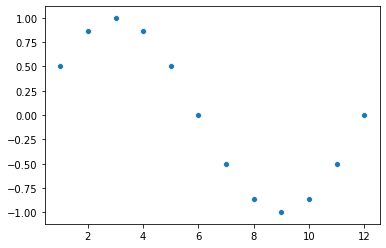

In [34]:
sns.scatterplot(months,months_sin).plot()

In [36]:
months_cos=np.cos(2*np.pi*months/12)

[]

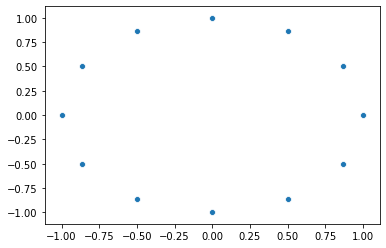

In [37]:
sns.scatterplot(months_sin,months_cos).plot()

In [38]:
def code_cyclic_features(data,columns,drop_cols=True):
    for col in columns:
        max_val=max(data[col])

        data[col+'_sin']=np.sin(2*np.pi*data[col]/max_val)
        data[col+'_cos']=np.cos(2*np.pi*data[col]/max_val)

        if drop_cols:
            del data[col]
    return data  

## Revisiting feature importance and issue with default importance in sklearn

In [39]:
data.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2.0,< 1 year
1,99592.0,19200,19200,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1.0,2 years
2,80059.0,35000,35000,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1.0,2 years
3,15825.0,10000,9975,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0.0,5 years
4,33182.0,12000,12000,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0.0,9 years


In [40]:
data.drop(['ID','Amount.Funded.By.Investors'],axis=1,inplace=True)

for col in ['Interest.Rate','Debt.To.Income.Ratio']:
    data[col]=data[col].str.replace("%","")
    
    

for col in ['Amount.Requested', 'Interest.Rate','Debt.To.Income.Ratio',
            'Open.CREDIT.Lines','Revolving.CREDIT.Balance']:
    data[col]=pd.to_numeric(data[col],errors='coerce')
    

k=data['FICO.Range'].str.split("-",expand=True).astype(float)

data['fico']=0.5*(k[0]+k[1])

del data['FICO.Range']

cat_cols=data.select_dtypes(['object']).columns

data=code_categorical_to_dummies(data,cat_cols)

for col in data.columns:
    if data[col].isnull().sum()>0:
        data.loc[data[col].isnull(),col]=data[col].mean()

In [41]:
x_train=data.drop(['Interest.Rate'],1)
y_train=data['Interest.Rate']

In [42]:
x_train.head()

,Amount.Requested,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,fico,Loan.Length_36 months,Loan.Length_60 months,Loan.Length_.,...,Employment.Length_2 years,Employment.Length_3 years,Employment.Length_5 years,Employment.Length_4 years,Employment.Length_1 year,Employment.Length_6 years,Employment.Length_7 years,Employment.Length_8 years,Employment.Length_nan,Employment.Length_9 years
0,20000.0,14.90,6541.67,14.0,14272.0,2.0,737.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19200.0,28.36,4583.33,12.0,11140.0,1.0,717.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,35000.0,23.81,11500.00,14.0,21977.0,1.0,692.0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,10000.0,14.30,3833.33,10.0,9346.0,0.0,697.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,12000.0,18.78,3195.00,11.0,14469.0,0.0,697.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
 np.random.random(size=len(x_train))

array([0.74590543, 0.65981867, 0.6642719 , ..., 0.61948892, 0.36816011,
       0.44372729])

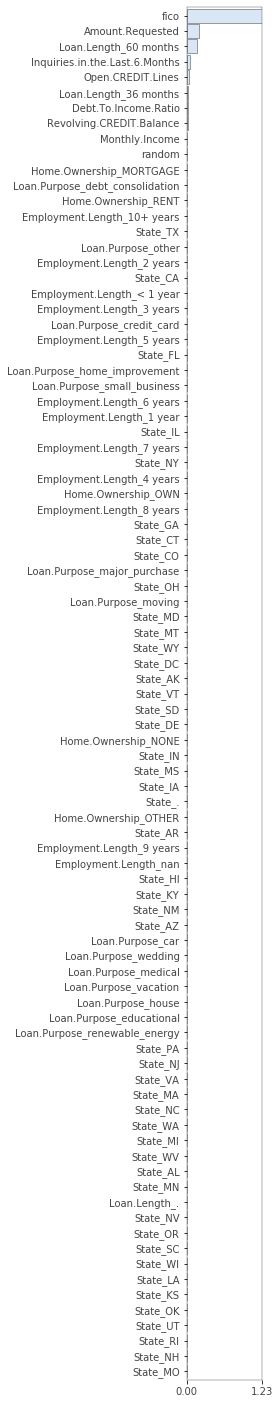

In [44]:
# Add column of random numbers
x_train['random'] = np.random.random(size=len(x_train))


rf = RandomForestRegressor(n_estimators=100,
                            min_samples_leaf=5,
                            n_jobs=-1,
                            oob_score=True)

rf.fit(x_train,y_train)
imp = importances(rf, x_train, y_train, n_samples=-1)
viz = plot_importances(imp)
viz.view()

# it is possible that with different iterations of the code result in features at boundary switch to other side
# dont worry about that , they dont make much difference either way [ and you have to draw a line somewhere]

## Transformed Features : capability of algos to capture transformation automatically

In [45]:
x_data= pd.DataFrame(np.random.random(size= (4000,5)), columns= ['x1','x2','x3','x4','x5'])

x_data.shape

(4000, 5)

In [46]:
x_data.head()

,x1,x2,x3,x4,x5
0,0.980598,0.366950,0.690637,0.003786,0.202975
1,0.849337,0.129096,0.776123,0.923704,0.276362
2,0.443981,0.110492,0.173661,0.850560,0.299142
3,0.245146,0.752477,0.285211,0.287696,0.398981
4,0.669100,0.444911,0.645065,0.332424,0.645425


In [47]:
x_data['y1']= 1.5 + x_data['x1'] + x_data['x2'] + x_data['x3'] + x_data['x4'] + x_data['x5'] + np.random.random(size=4000)
x_data['y2']= 1.5 + (x_data['x1']**2) + (x_data['x2']**2) + (x_data['x3']**2) + (x_data['x4']**2) + (x_data['x5']**2) + np.random.random(size=4000)
x_data['y3']= 1.5 + (np.log(x_data['x1'])) + (np.log(x_data['x2'])) + (np.log(x_data['x3'])) + (np.log(x_data['x4'])) + (np.log(x_data['x5'])) + np.random.random(size=4000)
x_data['y4']= 1.5 + (1/x_data['x1']) + (1/x_data['x2']) + (1/x_data['x3']) + (1/x_data['x4']) + (1/x_data['x5']) + np.random.random(size=4000)
x_data['y5']= 1.5 + (x_data['x2']/x_data['x1'])  + (x_data['x3']/x_data['x2'])  + (x_data['x4']/x_data['x3']) + (x_data['x5']/x_data['x4']) + np.random.random(size=4000)

x_data.head(5)

,x1,x2,x3,x4,x5,y1,y2,y3,y4,y5
0,0.980598,0.366950,0.690637,0.003786,0.202975,3.964593,3.873032,-6.791044,276.179573,58.009658
1,0.849337,0.129096,0.776123,0.923704,0.276362,4.583466,4.206036,-1.918036,16.642081,10.054097
2,0.443981,0.110492,0.173661,0.850560,0.299142,4.032087,3.458915,-4.481911,23.249425,9.141369
3,0.245146,0.752477,0.285211,0.287696,0.398981,4.084445,3.073436,-2.976263,17.124758,8.069717
4,0.669100,0.444911,0.645065,0.332424,0.645425,4.587344,3.698531,-1.317520,12.187808,6.302438


In [48]:

train, test= train_test_split(x_data, test_size= 0.2, random_state=2)

x_train= train.drop(['y1','y2','y3','y4','y5'],1)
y_train= train[['y1','y2','y3','y4','y5']]

x_test= test.drop(['y1','y2','y3','y4','y5'],1)
y_test= test[['y1','y2','y3','y4','y5']]

results= pd.DataFrame(columns=["Algo","Relation","MAE"])

In [49]:
def Random_Forest(x,y,relation):
    rf= RandomForestRegressor(n_estimators=200)
    rf.fit(x,y_train[y])
    y_pred=rf.predict(x_test)
    mae= np.round(mean_absolute_error(y_test[y],y_pred),4)
    global results
    results= results.append({'Algo':"Random Forest",'Relation':relation,'MAE':mae}, ignore_index=True)
    
    #return(print("Algo: Random Forest\nRelation: "+relation+" \nMean Absolute error: ",mean_absolute_error(y_test[y],y_pred)))
    

def SV_M (x,y, relation):
    svr= SVR()
    svr.fit(x,y_train[y])
    y_pred=svr.predict(x_test)
    mae= np.round(mean_absolute_error(y_test[y],y_pred),4)
    global results
    results= results.append({'Algo':"SVM",'Relation':relation,'MAE':mae}, ignore_index=True)
   # return(print("Algo: SVM \nRelation: "+relation+" \nMean Absolute error: ",mean_absolute_error(y_test[y],y_pred)))

def XG_B(x,y, relation):
    xgb= XGBRegressor(n_estimators=200,learning_rate=.01,objective='reg:squarederror')
    xgb.fit(x,y_train[y])
    y_pred=xgb.predict(x_test)
    mae= np.round(mean_absolute_error(y_test[y],y_pred),4)
    global results
    results= results.append({'Algo':"XGB",'Relation':relation,'MAE':mae}, ignore_index=True)
   # return(print("Algo: XGB \nRelation: "+relation+" \nMean Absolute error: ",mean_absolute_error(y_test[y],y_pred)))

In [50]:
# SET-1 (x)

Random_Forest(x_train,"y1","x")

SV_M(x_train,"y1","x")

XG_B(x_train,"y1","x")

In [51]:
# SET-2 (x^2)

Random_Forest(x_train,"y2","x^2")

SV_M(x_train,"y2","x^2")

XG_B(x_train,"y2","x^2")



In [52]:
# SET-3 (log(x))
Random_Forest(x_train,"y3","log(x)")

SV_M(x_train,"y3","log(x)")

XG_B(x_train,"y3","log(x)")



In [53]:
# SET-4 (Inverse)
Random_Forest(x_train,"y4","1/x")

SV_M(x_train,"y4","1/x")

XG_B(x_train,"y4","1/x")

In [54]:
# SET-5 (Ratios)

Random_Forest(x_train,"y5","Ratio")

SV_M(x_train,"y5","Ratio")

XG_B(x_train,"y5","Ratio")

In [55]:
results

,Algo,Relation,MAE
0,Random Forest,x,0.2802
1,SVM,x,0.2621
2,XGB,x,0.5538
3,Random Forest,x^2,0.2682
4,SVM,x^2,0.2574
5,XGB,x^2,0.4868
6,Random Forest,log(x),0.3709
7,SVM,log(x),0.4429
8,XGB,log(x),0.8940
9,Random Forest,1/x,21.9698
